In [1]:
import pbjam as pb
import pandas as pd
import lightkurve as lk
from tqdm import tqdm

In [2]:
def get_lc(target):
    lc_all = lk.search_lightcurvefile(target).download_all()
    lc = lc_all[0].PDCSAP_FLUX.normalize().remove_outliers().flatten()
    for lcx in lc_all[1:]:
        lc = lc.append(lcx.PDCSAP_FLUX.normalize().remove_outliers().flatten())
    lc = lc.remove_outliers(4)
    return lc

def to_pg(lc, numax, dnu):
    pg = lc.to_periodogram(normalization='psd', 
                           minimum_frequency=numax - 5.0*dnu,
                           maximum_frequency=numax + 5.0*dnu).flatten()
    return pg

In [3]:
df = pd.read_csv('mytgts.csv')
df.head()

,ID,dnu,dnu_err,numax,numax_err,teff,teff_err,bp_rp,bp_rp_err
0,1433593,6.241,0.013,69.14,0.59,4956,100,1.327025,0.05
1,1433730,4.085,0.019,40.37,0.54,4767,100,1.424954,0.05
2,2018392,3.795,0.013,33.92,0.55,4908,100,1.417112,0.05
3,2140446,5.673,0.012,57.60,0.56,4665,100,1.446697,0.05
4,2307683,4.309,0.012,39.95,0.51,4799,100,1.369279,0.05


In [4]:
lcs = {}
for idx, row in df.iterrows():
    print('.', end='')
    ID = str(int(row.ID))
    lcs[ID] = get_lc(ID)

.........

In [5]:
pgs = {}
for idx, row in df.iterrows():
    ID = str(int(row.ID))
    pgs[ID] = to_pg(lcs[ID], row.numax, row.dnu)

In [6]:
stars = {}
for idx, row in df.iterrows():
    ID = str(int(row.ID))
    star = pb.star(ID, pgs[ID], 
                       [row.numax, row.numax_err], 
                       [row.dnu, row.dnu_err], 
                       [row.teff, row.teff_err],
                       [row.bp_rp, row.bp_rp_err], 
                       store_chains=True, 
                       nthreads=4)
    stars[ID] = star

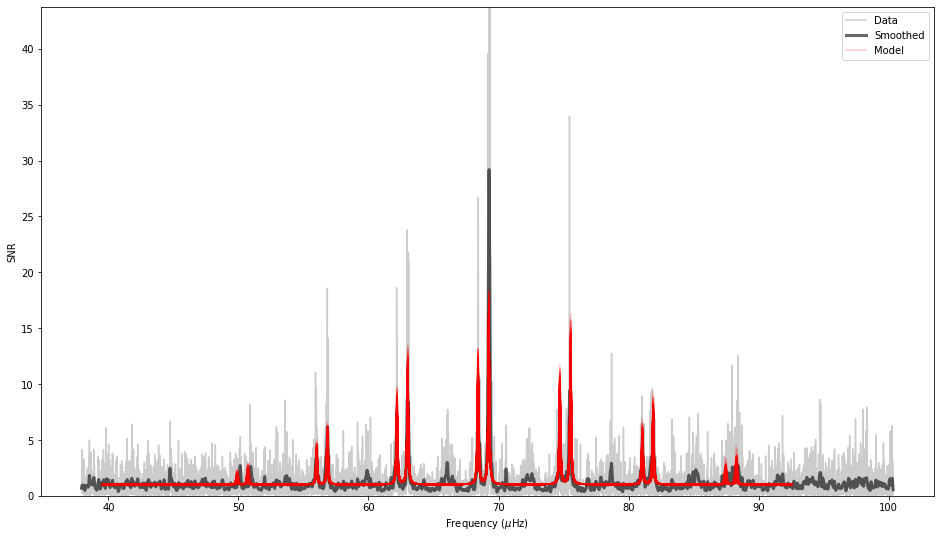

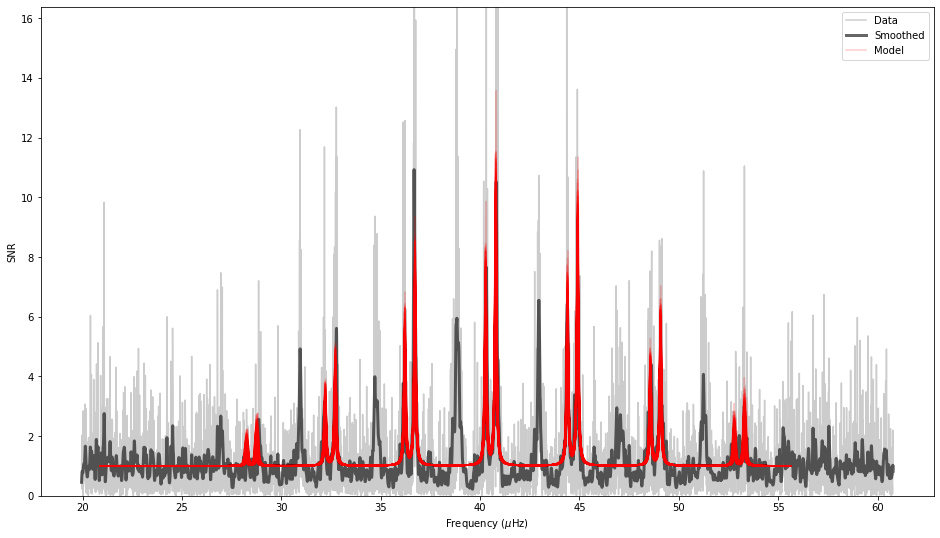

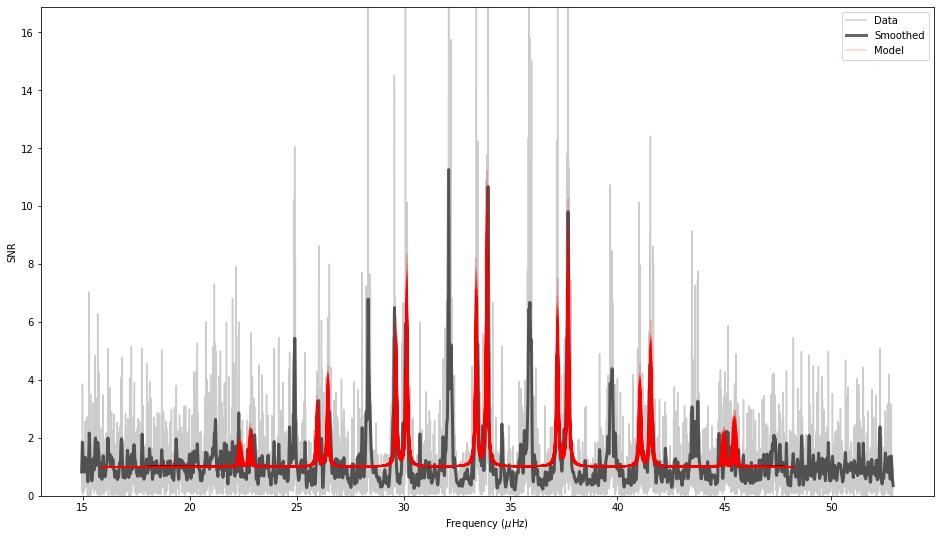

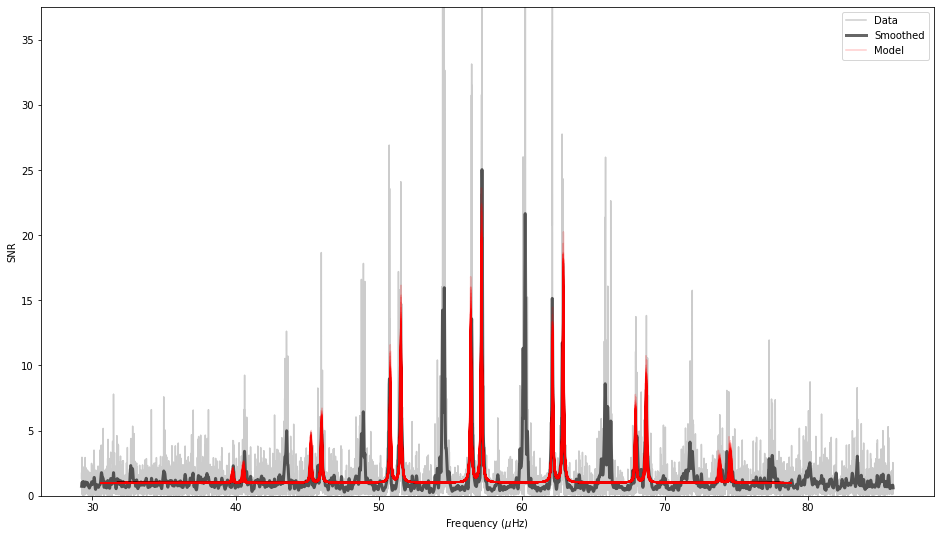

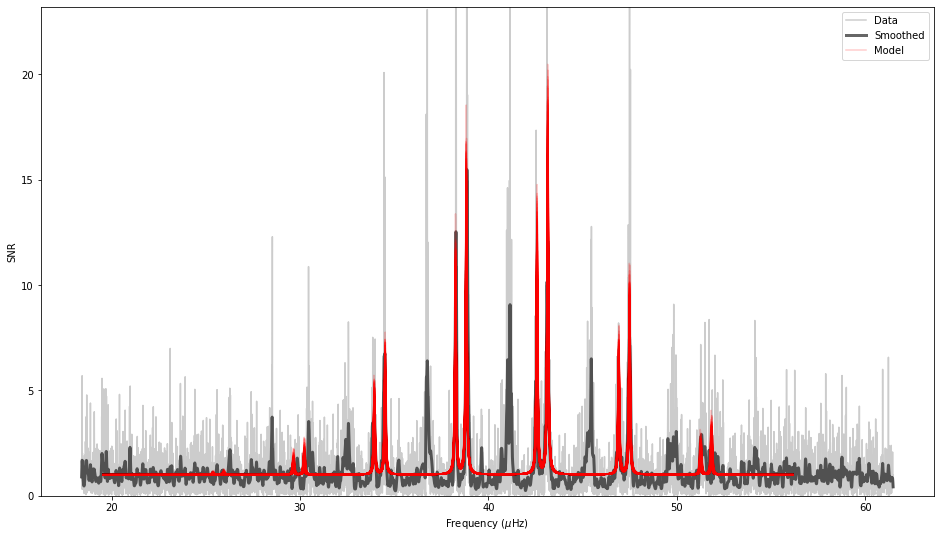

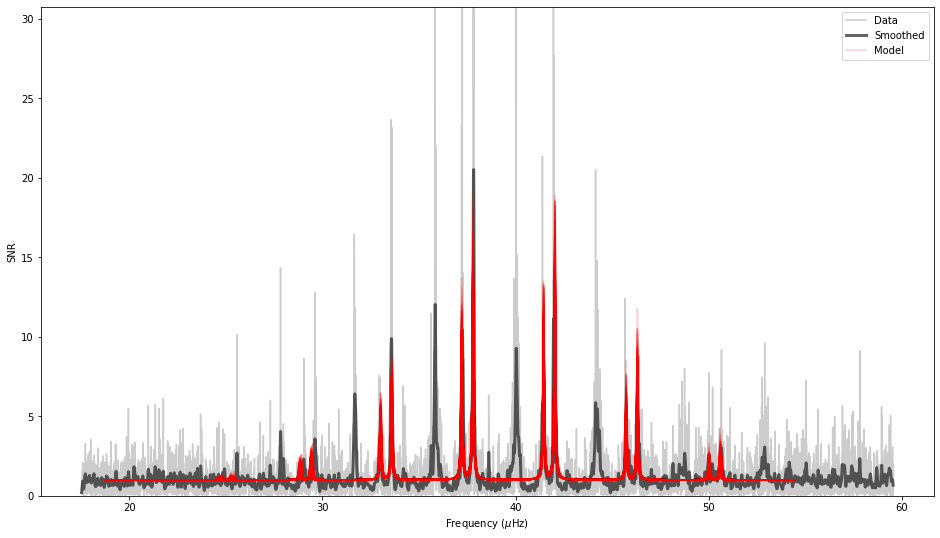

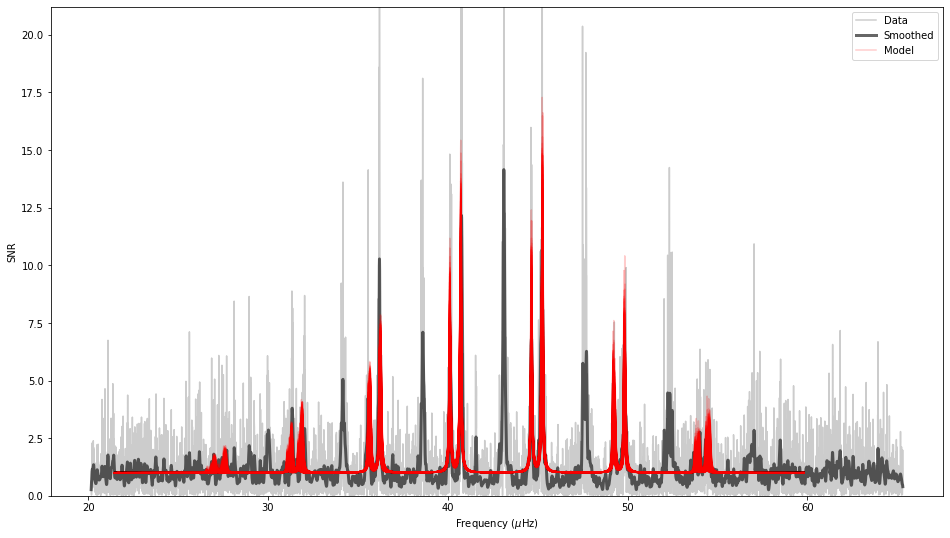

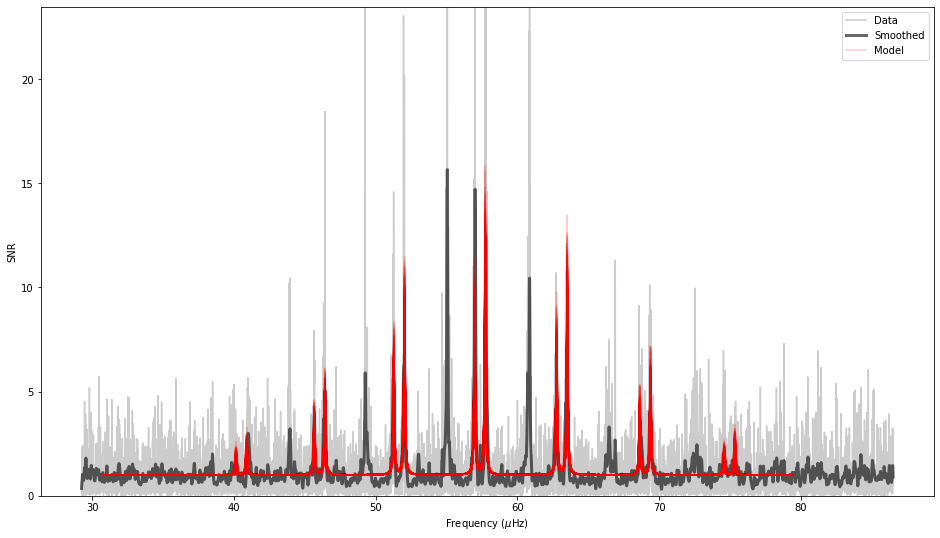

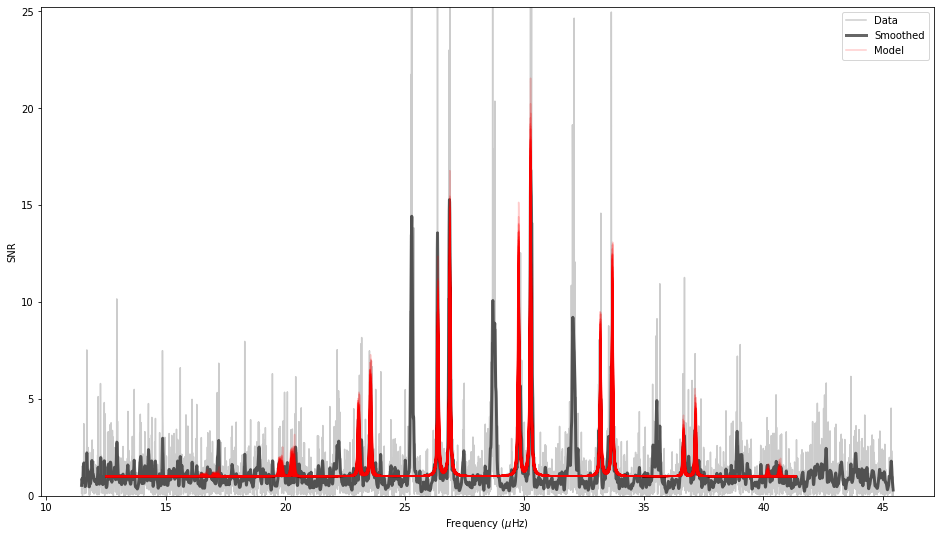

In [7]:
import matplotlib.pyplot as plt
for idx, row in df.iterrows():
    ID = str(int(row.ID))
    stars[ID].run_epsilon()
    stars[ID].run_asy_peakbag(norders=7, burnin=5000)
    stars[ID].asy_fit.plot(thin=100)
    plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:42<00:00, 189.29draws/s]
The acceptance probability does not match the target. It is 0.6988227173654266, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.6660004455480648, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 26000/26000 [02:04<00:00, 208.69draws/s]
The accepta

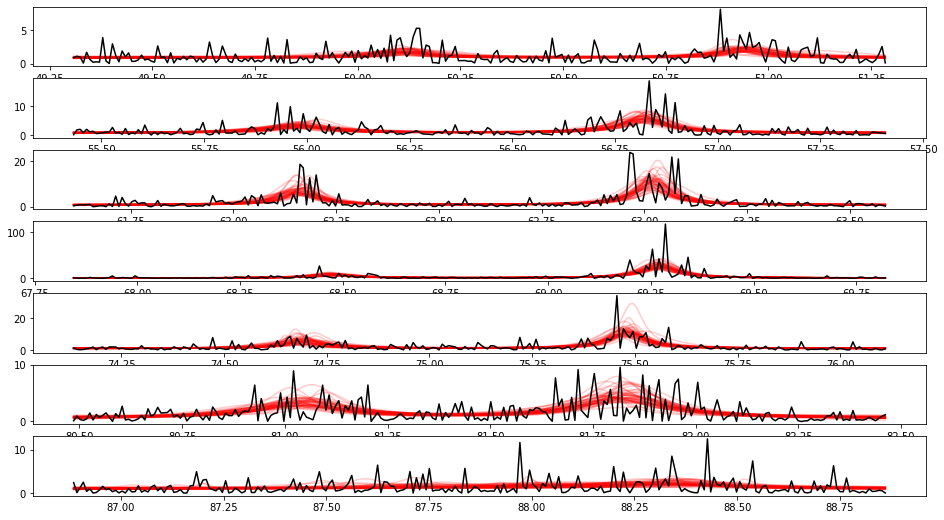

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:09<00:00, 114.58draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


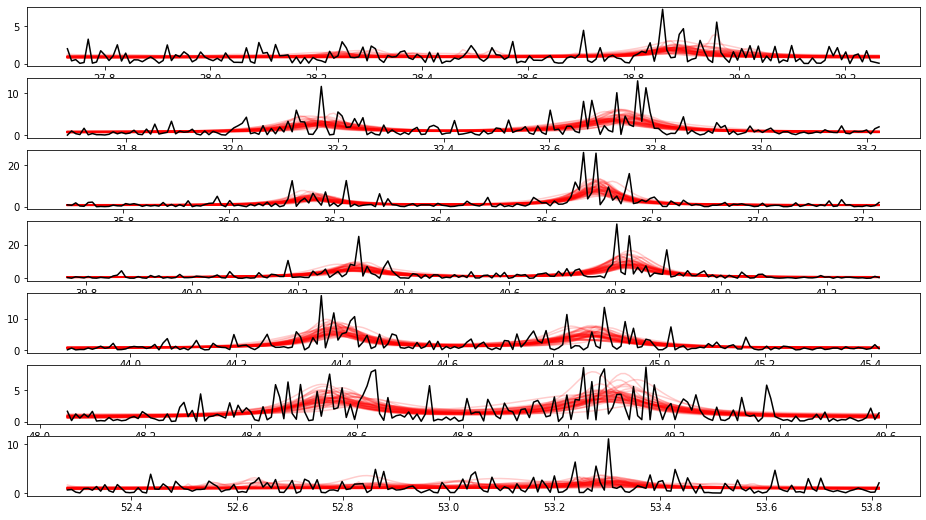

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:55<00:00, 143.79draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


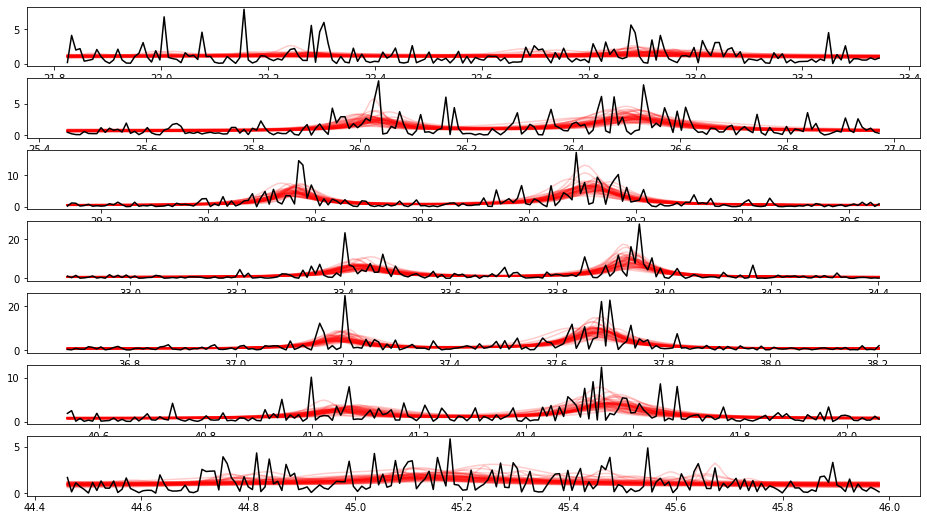

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:38<00:00, 207.39draws/s]
The acceptance probability does not match the target. It is 0.9102191719608784, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9103100744563978, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 26000/26000 [02:09<00:00, 200.56draws/s]
The accepta

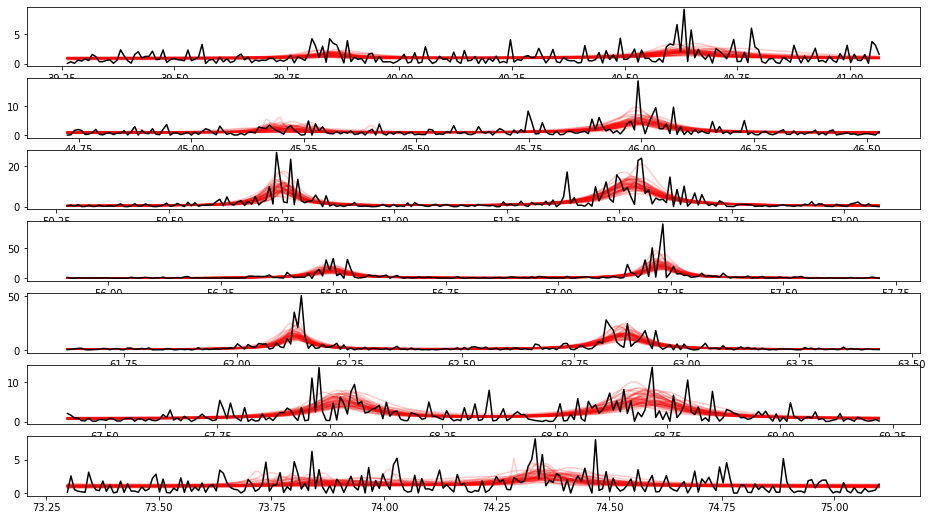

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:12<00:00, 109.77draws/s]
The acceptance probability does not match the target. It is 0.697572466318614, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 26000/26000 [03:46<00:00, 34.46draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.


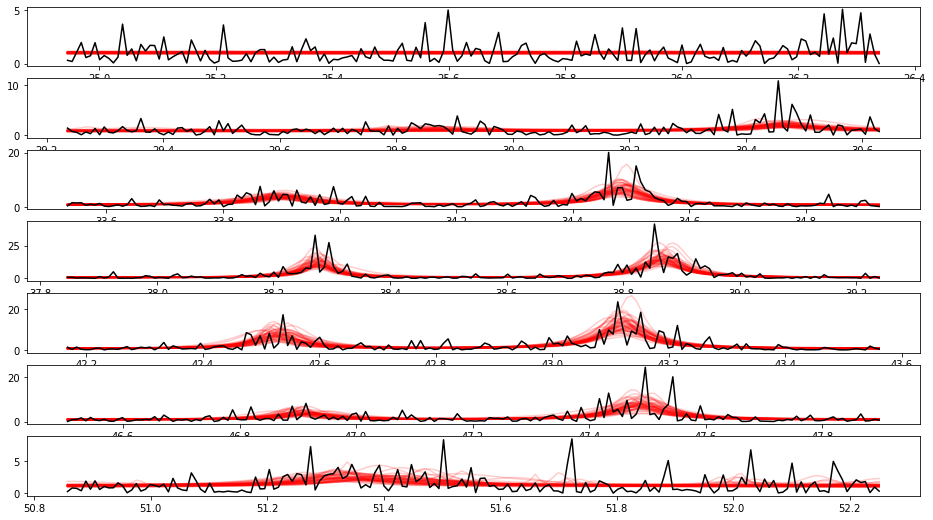

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:53<00:00, 150.37draws/s]
The acceptance probability does not match the target. It is 0.7119918950080394, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


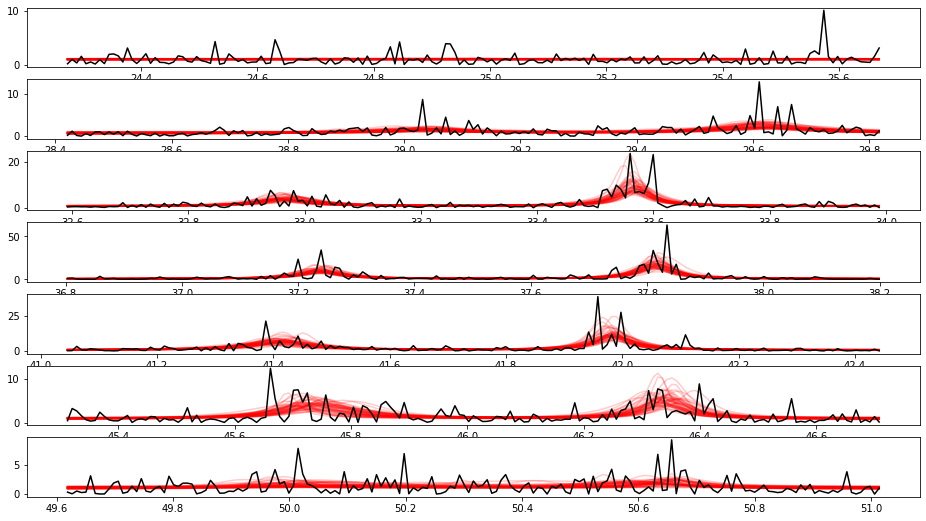

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:08<00:00, 32.89draws/s] 
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 26000/26000 [03:25<00:00, 126.23draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


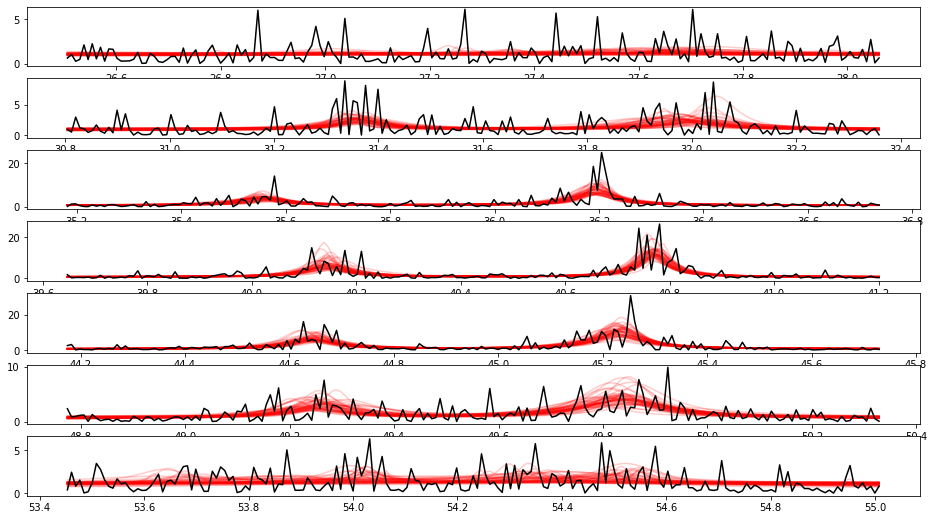

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [01:58<00:00, 15.16draws/s] 
The acceptance probability does not match the target. It is 0.5639928352703933, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


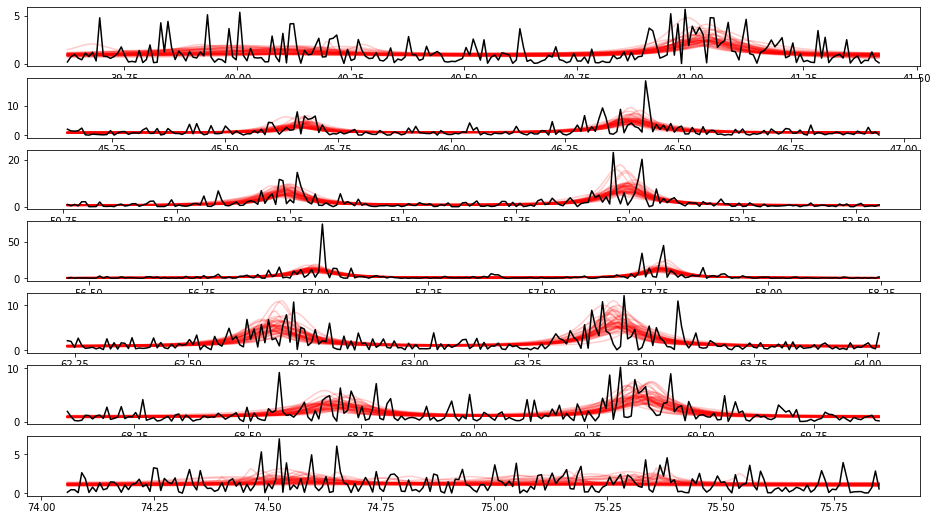

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [back, height2, height0, width2, width0, l2, l0]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:59<00:00, 135.08draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


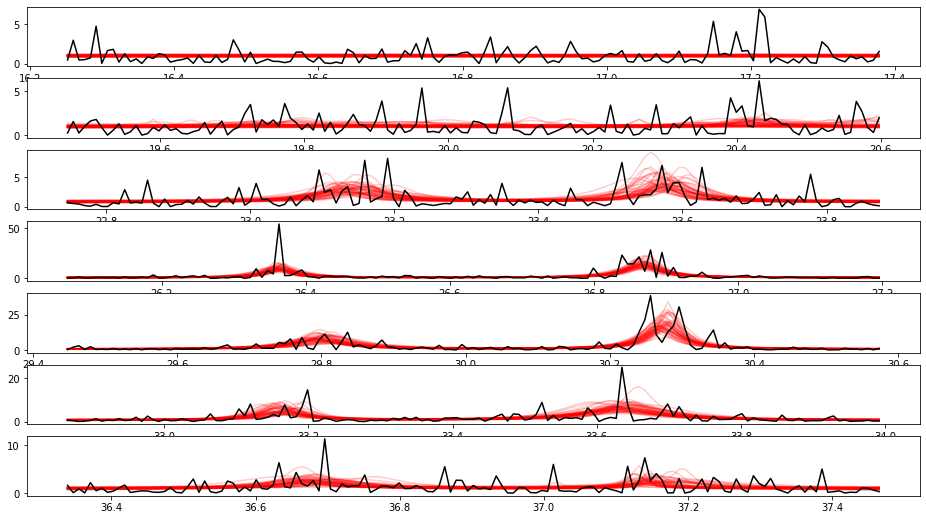

In [8]:
for idx, row in df.iterrows():
    ID = str(int(row.ID))
    stars[ID].run_peakbag()
    stars[ID].peakbag.plot_fit(thin=10)
    plt.show()